In [12]:
%matplotlib inline
import numpy as np
import skimage.external.tifffile
import os
import matplotlib.pyplot as plt
from PIL import Image

import multiprocessing  
from multiprocessing import Pool

import pylattice as pyl
import pylattice.functions.TiffProcessing as tifproc

import sys
sys.path.append('/Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/src/python/pylattice/functions')
import ParallelFunctions
from pprint import pprint

In [2]:
truthFile = "/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_C_firstFrames/sample3_pos4_o3/dmask_01.tif"
predictionFile = "/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_C_firstFrames/sample3_pos4_o3/3prediction.tif"


In [3]:
truth = ParallelFunctions.open3dTiff(truthFile)
prediction = ParallelFunctions.open3dTiff(predictionFile)

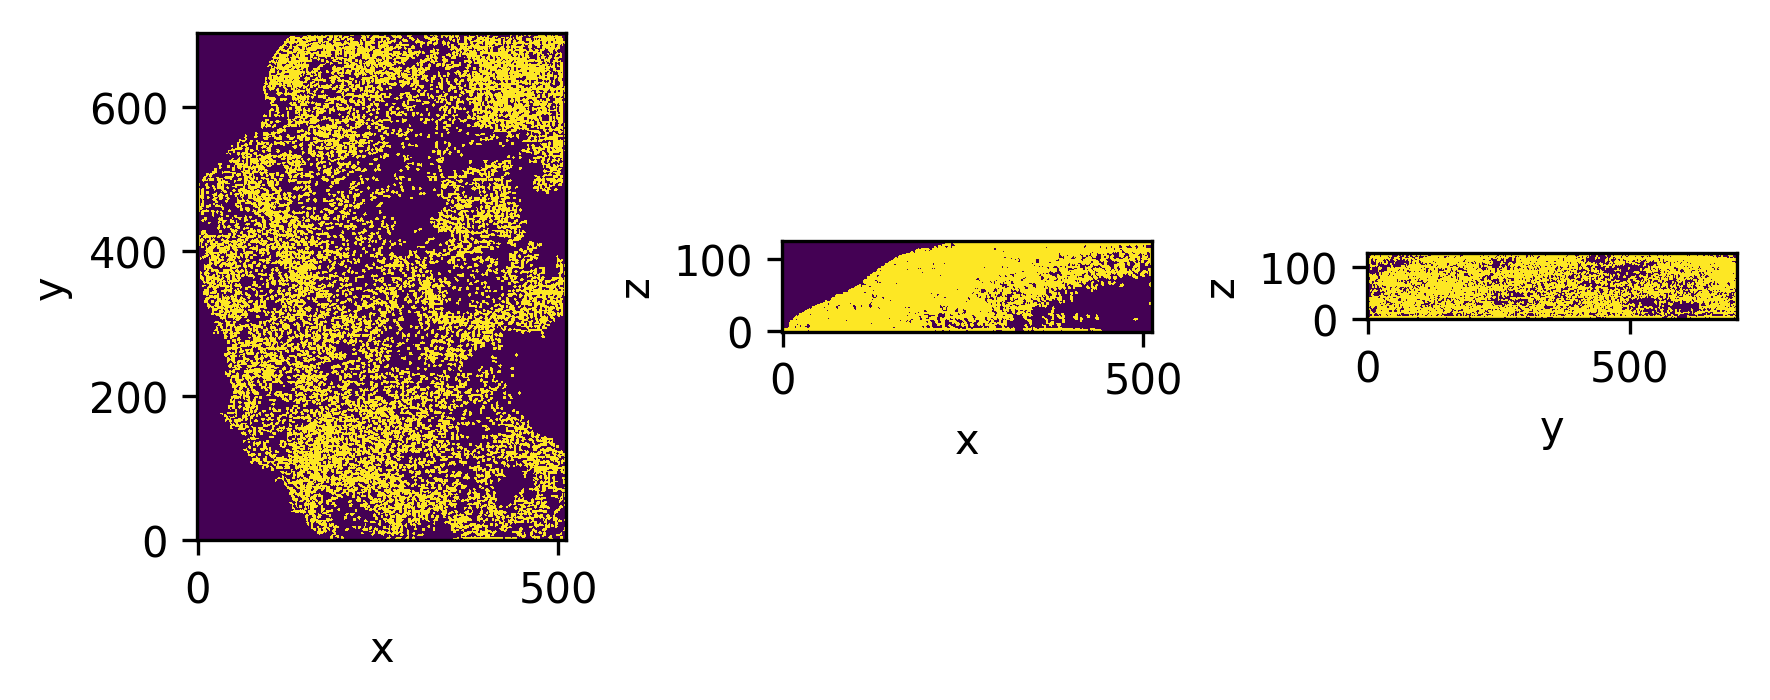

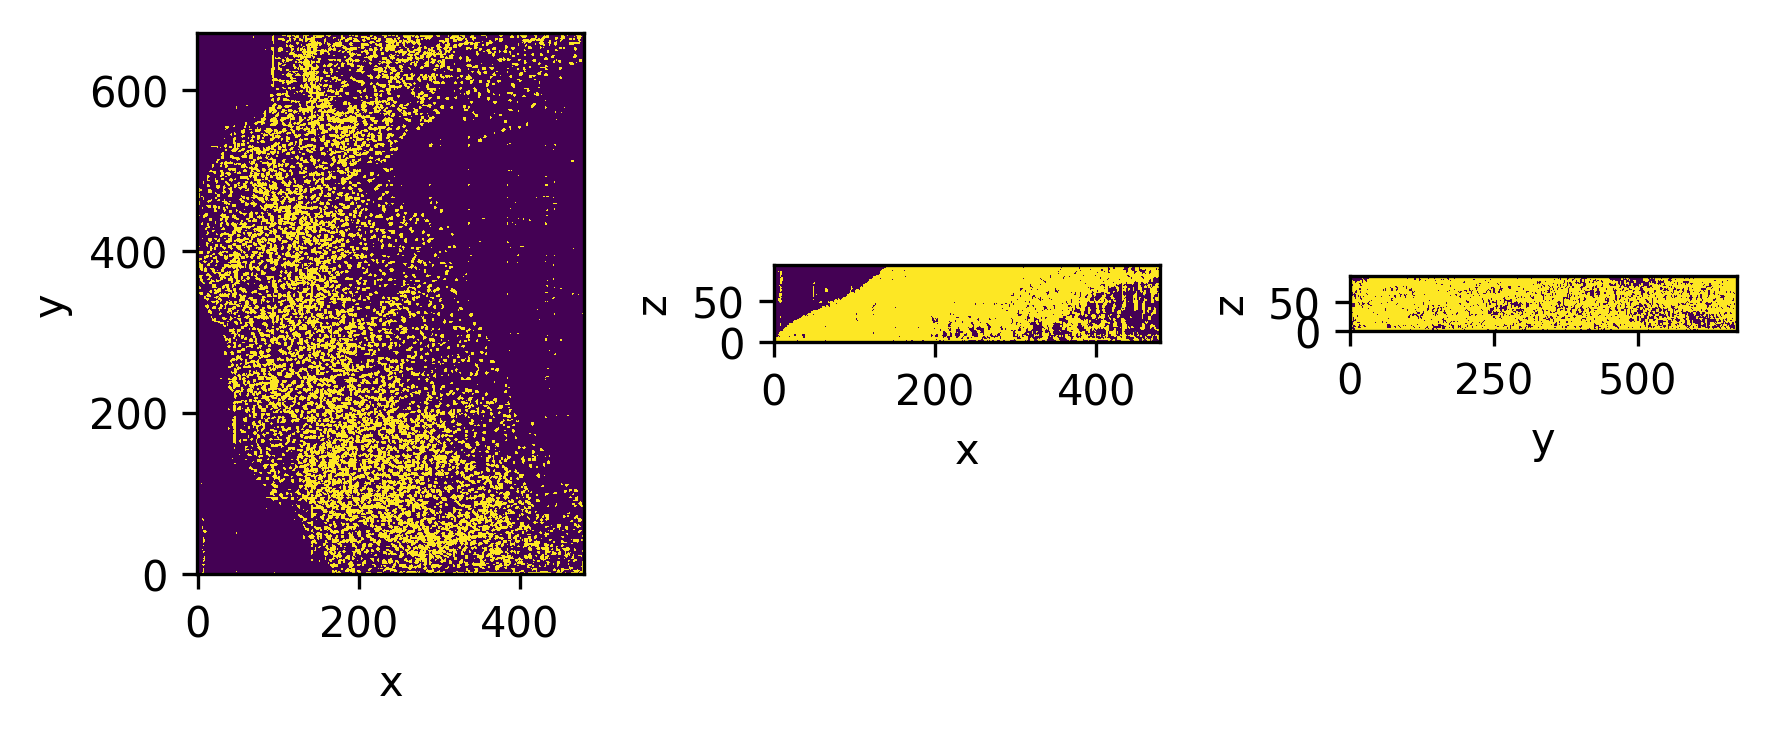

In [4]:
tifproc.maxIntensityProjection(truth)
tifproc.maxIntensityProjection(prediction)

# label all connected components in the mask

In [5]:
from scipy import ndimage
label_im, nb_labels = ndimage.label(truth)
print(nb_labels)

6045


In [6]:
import skimage
import os

multiplierForOutput = 1
outputPath_tiff = "./truth_components_labeled.tiff"
skimage.external.tifffile.imsave(outputPath_tiff, (label_im*multiplierForOutput).astype('uint16'))    
print(os.path.abspath(outputPath_tiff))


/Users/johannesschoeneberg/git/JohSchoeneberg/pyLatticeML/src/evaluationMetrics/truth_components_labeled.tiff


In [7]:
print(nb_labels)

6045


In [8]:
ndimage.find_objects(label_im==4)[0]

(slice(2, 6, None), slice(10, 18, None), slice(280, 285, None))

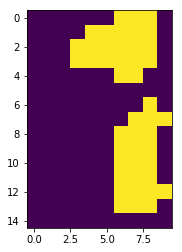

In [9]:
slice_z, slice_x, slice_y  = ndimage.find_objects(label_im==7)[0]
roi = truth[slice_z, slice_x, slice_y]
plt.imshow(roi[0])     

In [10]:
ndimage.measurements.center_of_mass(truth)

(68.59212809398655, 352.27227748068793, 249.84701637610613)

In [13]:
label_im, nb_labels = ndimage.label(truth)
truth_allCentersOfMass = ndimage.measurements.center_of_mass(truth, label_im,range(1,nb_labels+1) )
pprint(truth_allCentersOfMass)

[(3.22007722007722, 8.944658944658945, 390.7683397683398),
 (3.0, 2.506849315068493, 432.24657534246575),
 (3.4742268041237114, 12.175257731958762, 167.98969072164948),
 (3.1774193548387095, 12.32258064516129, 282.2903225806452),
 (3.60625, 21.825, 161.2875),
 (3.3986254295532645, 26.077319587628867, 362.53264604810994),
 (2.9411764705882355, 20.169934640522875, 274.60130718954247),
 (2.6292134831460676, 19.797752808988765, 188.56179775280899),
 (2.823529411764706, 20.0, 379.0980392156863),
 (3.225721784776903, 38.976377952755904, 157.31233595800524),
 (2.8421052631578947, 34.31578947368421, 315.39473684210526),
 (7.874015748031496, 39.54330708661417, 341.40551181102364),
 (3.3333333333333335, 37.03174603174603, 350.3492063492063),
 (3.1226415094339623, 39.028301886792455, 141.87735849056602),
 (3.6808510638297873, 40.1063829787234, 181.95744680851064),
 (2.4390243902439024, 48.34146341463415, 130.7560975609756),
 (2.6666666666666665, 44.0, 140.66666666666666),
 (2.7954545454545454, 45

 (9.853658536585366, 322.3658536585366, 118.48780487804878),
 (13.910179640718562, 369.98802395209583, 40.137724550898206),
 (11.891402714932127, 367.8099547511312, 130.35294117647058),
 (10.733333333333333, 377.62666666666667, 53.586666666666666),
 (11.101449275362318, 400.44202898550725, 15.152173913043478),
 (10.509803921568627, 405.7647058823529, 120.33333333333333),
 (9.953488372093023, 420.16279069767444, 77.53488372093024),
 (10.0625, 420.875, 131.58333333333334),
 (10.11111111111111, 442.0, 130.2037037037037),
 (9.695652173913043, 444.0652173913044, 30.76086956521739),
 (10.133333333333333, 465.1666666666667, 23.0),
 (9.75, 478.36538461538464, 96.84615384615384),
 (9.904109589041095, 491.28767123287673, 58.863013698630134),
 (11.934659090909092, 633.6477272727273, 106.5),
 (13.55072463768116, 34.92028985507246, 160.6014492753623),
 (15.981927710843374, 34.81325301204819, 308.51807228915663),
 (10.8203125, 54.984375, 150.3828125),
 (12.210084033613445, 81.55882352941177, 192.063

 (34.67307692307692, 137.96153846153845, 158.67307692307693),
 (33.4375, 147.75, 127.20833333333333),
 (35.04838709677419, 160.48387096774192, 257.16129032258067),
 (33.76923076923077, 169.33333333333334, 249.4102564102564),
 (35.07843137254902, 178.76470588235293, 238.33333333333334),
 (34.10526315789474, 191.5, 207.22368421052633),
 (33.851851851851855, 194.5185185185185, 142.42592592592592),
 (34.285714285714285, 397.53061224489795, 46.91836734693877),
 (34.07843137254902, 399.11764705882354, 158.64705882352942),
 (34.44897959183673, 434.6938775510204, 145.6122448979592),
 (34.293103448275865, 442.1896551724138, 48.275862068965516),
 (34.26315789473684, 457.82456140350877, 70.96491228070175),
 (33.73684210526316, 461.3421052631579, 103.0),
 (32.57142857142857, 471.07142857142856, 89.78571428571429),
 (34.61363636363637, 476.22727272727275, 93.18181818181819),
 (34.21052631578947, 482.42105263157896, 81.19298245614036),
 (35.13333333333333, 496.02666666666664, 87.16),
 (34.4545454545

 (55.59574468085106, 92.80851063829788, 194.82978723404256),
 (55.78431372549019, 93.23529411764706, 362.1372549019608),
 (55.72, 98.76, 251.12),
 (56.18333333333333, 106.9, 370.45),
 (57.093333333333334, 113.69333333333333, 239.42666666666668),
 (55.951219512195124, 122.3170731707317, 163.82926829268294),
 (56.425, 123.0, 226.8),
 (60.68599033816425, 134.40096618357487, 174.93719806763286),
 (56.355555555555554, 144.6, 168.4),
 (55.51162790697674, 175.7674418604651, 157.51162790697674),
 (56.59615384615385, 183.34615384615384, 298.8076923076923),
 (56.355932203389834, 187.67796610169492, 253.11864406779662),
 (56.84, 192.06, 151.88),
 (55.95454545454545, 195.4090909090909, 143.6818181818182),
 (55.72, 202.02, 144.62),
 (56.75409836065574, 204.672131147541, 262.672131147541),
 (56.04, 223.52, 247.44),
 (56.21153846153846, 233.51923076923077, 238.80769230769232),
 (56.18691588785047, 236.21495327102804, 216.44859813084113),
 (54.916666666666664, 246.91666666666666, 110.83333333333333),


 (72.96, 632.6, 299.92),
 (73.5813953488372, 636.7674418604652, 399.5348837209302),
 (73.91176470588235, 644.8529411764706, 347.1029411764706),
 (79.35802469135803, 650.3518518518518, 236.57407407407408),
 (74.0, 660.8421052631579, 225.1315789473684),
 (73.73469387755102, 663.6530612244898, 249.57142857142858),
 (73.9074074074074, 665.425925925926, 434.24074074074076),
 (73.85714285714286, 669.5714285714286, 377.2857142857143),
 (76.52325581395348, 676.0116279069767, 140.47674418604652),
 (74.85714285714286, 684.2738095238095, 222.48809523809524),
 (74.87671232876713, 687.6438356164383, 259.24657534246575),
 (73.73809523809524, 688.6904761904761, 265.7142857142857),
 (73.91666666666667, 689.2708333333334, 322.5833333333333),
 (73.96296296296296, 693.2592592592592, 159.44444444444446),
 (72.0, 696.5, 174.0),
 (74.76271186440678, 696.542372881356, 185.64406779661016),
 (73.0, 30.0, 392.0),
 (76.1076923076923, 47.90769230769231, 432.7846153846154),
 (76.24107142857143, 65.99107142857143, 

 (97.56164383561644, 81.16438356164383, 257.73972602739724),
 (94.875, 88.6875, 247.6875),
 (95.36111111111111, 96.26388888888889, 239.06944444444446),
 (95.71428571428571, 99.95714285714286, 384.2857142857143),
 (95.109375, 120.796875, 422.890625),
 (98.7639751552795, 141.2173913043478, 295.167701863354),
 (94.57407407407408, 169.11111111111111, 271.85185185185185),
 (95.79220779220779, 187.2077922077922, 415.038961038961),
 (93.0, 189.0, 243.0),
 (95.65714285714286, 193.2, 284.9714285714286),
 (94.66666666666667, 200.16666666666666, 220.97619047619048),
 (95.82978723404256, 230.70212765957447, 266.97872340425533),
 (98.29464285714286, 284.20535714285717, 217.64285714285714),
 (96.79591836734694, 295.5408163265306, 171.76530612244898),
 (94.88888888888889, 295.1333333333333, 349.5777777777778),
 (95.33333333333333, 320.62745098039215, 338.8627450980392),
 (95.24444444444444, 333.53333333333336, 240.11111111111111),
 (100.05555555555556, 333.8809523809524, 162.63492063492063),
 (95.218

 (114.0754716981132, 387.1320754716981, 257.2830188679245),
 (117.51034482758621, 413.3586206896552, 386.5931034482759),
 (113.40425531914893, 434.3191489361702, 217.85106382978722),
 (112.93103448275862, 456.2068965517241, 410.2931034482759),
 (113.83636363636364, 463.54545454545456, 371.2),
 (113.08333333333333, 475.5, 349.375),
 (113.25531914893617, 481.2340425531915, 211.40425531914894),
 (112.47619047619048, 491.1111111111111, 343.3492063492063),
 (113.2156862745098, 497.29411764705884, 364.9019607843137),
 (112.66, 506.8, 328.56),
 (117.53809523809524, 517.7714285714286, 431.2190476190476),
 (112.77272727272727, 526.9772727272727, 248.1590909090909),
 (112.58823529411765, 534.5686274509804, 334.1764705882353),
 (112.63333333333334, 539.1333333333333, 255.8),
 (113.48936170212765, 540.2765957446809, 242.31914893617022),
 (112.4375, 543.9791666666666, 285.2916666666667),
 (117.37931034482759, 549.1685823754789, 252.42528735632183),
 (112.82, 548.42, 436.32),
 (112.72, 549.38, 419.4

In [14]:
label_im, nb_labels = ndimage.label(prediction)
prediction_allCentersOfMass = ndimage.measurements.center_of_mass(prediction, label_im,range(1,nb_labels+1) )
pprint(prediction_allCentersOfMass)

[(3.051948051948052, 1.12987012987013, 175.11688311688312),
 (0.7894736842105263, 2.4473684210526314, 193.31578947368422),
 (1.5416666666666667, 1.7083333333333333, 420.7083333333333),
 (4.345029239766082, 1.8245614035087718, 431.87719298245617),
 (2.3, 1.5714285714285714, 448.6714285714286),
 (1.2285714285714286, 10.542857142857143, 192.8),
 (2.526848409748038, 11.789136720363485, 6.947542337876911),
 (0.8235294117647058, 16.323529411764707, 303.44117647058823),
 (2.107142857142857, 13.964285714285714, 448.10714285714283),
 (0.5, 15.5, 151.0),
 (1.2590799031476998, 16.493946731234868, 142.61743341404357),
 (2.2888888888888888, 18.266666666666666, 193.13333333333333),
 (2.169230769230769, 20.153846153846153, 379.4923076923077),
 (1.9166666666666667, 21.354166666666668, 187.39583333333334),
 (1.5151515151515151, 22.78787878787879, 282.030303030303),
 (1.1414617106335632, 36.94524730570686, 194.04296637470404),
 (1.6585365853658536, 26.634146341463413, 142.14634146341464),
 (0.6666666666

 (2.8484848484848486, 392.2121212121212, 34.39393939393939),
 (3.603448275862069, 392.9655172413793, 11.775862068965518),
 (3.6779661016949152, 392.8813559322034, 123.40677966101696),
 (4.392857142857143, 394.3392857142857, 68.92857142857143),
 (3.0, 397.0285714285714, 28.2),
 (4.3762171732074355, 402.6711419297728, 96.18810858660372),
 (5.2823529411764705, 418.7647058823529, 40.858823529411765),
 (2.5, 420.5, 2.0),
 (3.3157894736842106, 433.89473684210526, 6.105263157894737),
 (2.9285714285714284, 433.7142857142857, 108.07142857142857),
 (7.375, 438.97727272727275, 16.352272727272727),
 (5.843507843507844, 455.49390474390475, 14.265072765072764),
 (3.9468085106382977, 457.09574468085106, 125.2127659574468),
 (4.107290426500455, 462.08922193430914, 15.107080327754044),
 (8.016949152542374, 472.3728813559322, 105.045197740113),
 (4.7101449275362315, 475.4492753623188, 127.82608695652173),
 (3.7948717948717947, 477.1794871794872, 144.69230769230768),
 (3.951219512195122, 480.707317073170

 (18.555555555555557, 228.11111111111111, 180.5),
 (17.0, 246.5, 51.0),
 (18.904761904761905, 250.04761904761904, 161.28571428571428),
 (17.857142857142858, 260.14285714285717, 126.14285714285714),
 (17.75, 268.75, 125.33333333333333),
 (18.23076923076923, 287.2692307692308, 136.8846153846154),
 (19.709302325581394, 317.0, 82.01162790697674),
 (18.85, 318.125, 128.85),
 (18.0, 334.53846153846155, 60.61538461538461),
 (19.887323943661972, 356.0422535211268, 20.3943661971831),
 (19.94987255734919, 360.29991503823277, 49.88327560290177),
 (19.88235294117647, 375.3109243697479, 142.1764705882353),
 (18.473684210526315, 378.36842105263156, 17.105263157894736),
 (20.333333333333332, 389.1714285714286, 23.257142857142856),
 (21.211267605633804, 398.85915492957747, 34.859154929577464),
 (18.444444444444443, 406.44444444444446, 66.22222222222223),
 (18.72222222222222, 432.6111111111111, 29.48148148148148),
 (19.1875, 454.5625, 91.9375),
 (17.8125, 464.625, 108.25),
 (19.43548387096774, 479.6612

 (33.76470588235294, 1.0588235294117647, 225.35294117647058),
 (33.82365145228216, 0.8817427385892116, 374.4716459197787),
 (31.5, 1.0, 456.5),
 (32.142857142857146, 11.571428571428571, 386.64285714285717),
 (31.333333333333332, 19.333333333333332, 174.0),
 (33.225, 24.55, 176.0),
 (35.18571428571428, 25.257142857142856, 268.252380952381),
 (32.05882352941177, 26.235294117647058, 394.3529411764706),
 (31.0, 30.5, 174.0),
 (31.0, 37.0, 464.5),
 (34.95652173913044, 43.48913043478261, 258.1304347826087),
 (33.47722613423656, 43.29530261164096, 189.6135127908013),
 (36.954198473282446, 65.16793893129771, 203.1145038167939),
 (31.0, 69.0, 222.0),
 (34.41121495327103, 83.64485981308411, 334.93457943925233),
 (34.072463768115945, 88.7536231884058, 284.6521739130435),
 (39.94949494949495, 95.38888888888889, 146.83838383838383),
 (33.056338028169016, 101.3943661971831, 149.61971830985917),
 (32.24914173614517, 102.87542913192742, 323.0),
 (33.86274509803921, 118.72549019607843, 153.666666666666

 (46.28, 99.76, 179.32),
 (47.68421052631579, 118.28947368421052, 151.05263157894737),
 (46.774193548387096, 119.12903225806451, 251.8709677419355),
 (51.72608695652174, 118.72608695652174, 374.59565217391304),
 (48.27835051546392, 124.08247422680412, 346.9896907216495),
 (45.0, 129.0, 281.0),
 (47.78431372549019, 130.33333333333334, 156.0),
 (47.646153846153844, 134.2923076923077, 134.23076923076923),
 (46.18181818181818, 136.45454545454547, 280.27272727272725),
 (49.42086330935252, 141.70863309352518, 321.3273381294964),
 (47.11363636363637, 150.1818181818182, 149.9318181818182),
 (46.125, 151.25, 293.75),
 (49.12173913043478, 158.19130434782608, 279.68695652173915),
 (46.0, 168.0, 274.25),
 (45.5, 177.0, 178.5),
 (46.07692307692308, 186.76923076923077, 141.76923076923077),
 (46.0, 189.0, 122.0),
 (45.5, 200.0, 221.0),
 (46.0, 214.5, 238.5),
 (46.76923076923077, 215.53846153846155, 232.46153846153845),
 (47.232142857142854, 222.41071428571428, 101.28571428571429),
 (47.73737373737374

 (56.5, 525.0, 217.0),
 (56.0, 525.0, 240.0),
 (56.6, 530.4, 0.0),
 (58.416666666666664, 528.5833333333334, 144.41666666666666),
 (56.0, 576.0, 193.0),
 (57.69230769230769, 598.0, 161.92307692307693),
 (59.1, 639.08, 334.8),
 (60.62307692307692, 657.2923076923076, 346.2692307692308),
 (58.189189189189186, 661.1351351351351, 206.2972972972973),
 (57.932203389830505, 662.9830508474577, 324.96610169491527),
 (59.72289156626506, 661.9759036144578, 377.28915662650604),
 (56.8, 665.6, 358.5),
 (58.70967741935484, 667.3870967741935, 144.7741935483871),
 (57.6736626567699, 667.6293831584336, 311.47786025083184),
 (57.66710268149117, 19.49967298888162, 8.833224329627207),
 (62.79245283018868, 20.330188679245282, 333.75471698113205),
 (59.43333333333333, 24.933333333333334, 354.26666666666665),
 (66.10258627624488, 39.230793982784974, 300.60512026385646),
 (59.72222222222222, 48.81944444444444, 274.6388888888889),
 (59.00532724505327, 49.194063926940636, 458.80593607305934),
 (58.21052631578947,

 (69.5, 16.0, 430.0),
 (72.24657534246575, 36.863013698630134, 339.63013698630135),
 (70.5, 38.0, 239.0),
 (70.2, 46.5, 478.4),
 (71.6, 64.02857142857142, 373.0),
 (71.89189189189189, 78.10810810810811, 350.3783783783784),
 (69.01162790697674, 78.0, 7.0),
 (71.31831610044313, 87.13905887317999, 380.9552648238025),
 (72.32679686249399, 100.30614695053626, 198.44909556587163),
 (69.0, 100.0, 388.0),
 (74.55714285714286, 121.21428571428571, 201.4),
 (69.0, 123.0, 348.0),
 (69.5, 123.75, 190.75),
 (69.0, 133.0, 249.0),
 (71.8974358974359, 138.23076923076923, 234.15384615384616),
 (71.86363636363636, 140.15151515151516, 206.56060606060606),
 (72.125, 147.171875, 237.4375),
 (70.0, 151.0, 358.0),
 (75.464, 154.12, 304.624),
 (72.73563218390805, 159.42528735632183, 286.57471264367814),
 (71.3695652173913, 168.56521739130434, 235.82608695652175),
 (71.875, 167.5, 334.0),
 (71.08823529411765, 170.08823529411765, 343.6470588235294),
 (71.9375, 178.225, 311.2125),
 (69.5, 184.0, 344.5),
 (70.1870

 (82.73863636363636, 335.25, 244.02272727272728),
 (80.0, 335.0, 252.0),
 (80.94628099173553, 337.6168294515402, 128.2336589030804),
 (83.57668711656441, 343.680981595092, 168.7116564417178),
 (84.01010101010101, 345.3636363636364, 155.65656565656565),
 (83.60317460317461, 363.12698412698415, 273.3333333333333),
 (82.44615384615385, 386.67692307692306, 158.23076923076923),
 (80.0, 392.0, 299.0),
 (82.04761904761905, 522.4285714285714, 186.9047619047619),
 (82.71052631578948, 559.4736842105264, 179.53947368421052),
 (82.13953488372093, 565.6511627906976, 292.3488372093023),
 (82.8076923076923, 576.8461538461538, 234.78846153846155),
 (83.1029411764706, 596.4705882352941, 291.6470588235294),
 (82.83653846153847, 596.4134615384615, 335.58653846153845),
 (82.87272727272727, 600.2727272727273, 235.92727272727274),
 (83.0204081632653, 603.795918367347, 240.53061224489795),
 (80.5, 617.0, 378.0),
 (84.0, 627.5454545454545, 428.6818181818182),
 (81.57142857142857, 635.8571428571429, 286.642857

 (94.1470588235294, 553.5882352941177, 399.29411764705884),
 (94.21739130434783, 556.9565217391304, 195.82608695652175),
 (94.04761904761905, 568.5238095238095, 375.42857142857144),
 (93.0, 570.0, 232.0),
 (94.2, 570.5428571428571, 262.77142857142854),
 (94.23076923076923, 571.0769230769231, 180.30769230769232),
 (94.45, 583.0, 188.1),
 (93.0, 584.5, 397.0),
 (94.18181818181819, 594.3030303030303, 421.6363636363636),
 (94.21428571428571, 596.5, 157.64285714285714),
 (94.47368421052632, 595.9473684210526, 386.1578947368421),
 (94.48387096774194, 598.6774193548387, 207.70967741935485),
 (94.26923076923077, 606.6153846153846, 204.84615384615384),
 (94.0, 610.5714285714286, 152.85714285714286),
 (94.3529411764706, 610.7352941176471, 373.7352941176471),
 (94.26108458390178, 614.7392564802183, 450.65228512960437),
 (94.125, 615.71875, 364.09375),
 (93.88235294117646, 620.8235294117648, 241.1764705882353),
 (93.8, 621.6, 355.5),
 (94.41666666666667, 626.9166666666666, 356.4166666666667),
 (94

In [15]:
# find the closest match between points
# if that distance is below threshold: match -> remove both locations, put predicted location into TP
# if that distance is above threshold: no-match found -> put the predicted location into FP
# end 1: put remaining locations in truth into FN (false negative, i.e. there is something but we predicted nothing)
# end 2: put the remaining locations in prediction into FP 

In [17]:
prediction_truth_matches = []
distanceThreshold = 1

truth_allCentersOfMass_available_for_match = truth_allCentersOfMass
for predictionCOM in prediction_allCentersOfMass:
    # got throuth the array and find the closest center of mass (COM) to that prediction
    closestDistance = 10000
    closestTruthCOM = []
    for truthCOM in truth_allCentersOfMass_available_for_match:
        if(False):
            print("pred {}".format(predictionCOM))
            print(truthCOM)
            print("dist {}".format(dist))
        dist = np.linalg.norm(np.array(predictionCOM)-np.array(truthCOM))
        if(dist < closestDistance):
            closestDistance = dist
            closestTruthCOM = truthCOM
    # in the end, check if that closest found COM is a shorter distance away than your threshold
    if(closestDistance < distanceThreshold):
        if(False):
            print([predictionCOM,closestTruthCOM,closestDistance])
        prediction_truth_matches.append([predictionCOM,closestTruthCOM,closestDistance])
        # remove the location to prevent double counting
        itemindex = np.where(truth_allCentersOfMass_available_for_match==closestTruthCOM)
        np.delete(truth_allCentersOfMass_available_for_match, itemindex)
    #else:
        #prediction_truth_matches.append([predictionCOM,None,None])


In [18]:
pprint(prediction_truth_matches)
print(len(prediction_truth_matches))

[[(2.169230769230769, 20.153846153846153, 379.4923076923077),
  (2.823529411764706, 20.0, 379.0980392156863),
  0.7792451375096028],
 [(2.8295454545454546, 37.18181818181818, 350.7386363636364),
  (3.3333333333333335, 37.03174603174603, 350.3492063492063),
  0.654201508084363],
 [(3.0185185185185186, 40.370370370370374, 181.6851851851852),
  (3.6808510638297873, 40.1063829787234, 181.95744680851064),
  0.7632169646063192],
 [(2.2641509433962264, 215.43396226415095, 101.45283018867924),
  (2.7804878048780486, 215.4390243902439, 101.09756097560975),
  0.6267739571811314],
 [(3.015873015873016, 312.1904761904762, 68.39682539682539),
  (3.3548387096774195, 312.61290322580646, 68.16129032258064),
  0.5906091033447527],
 [(2.2941176470588234, 356.6862745098039, 79.05882352941177),
  (2.8085106382978724, 356.468085106383, 79.0),
  0.5618424804280034],
 [(2.627450980392157, 369.6666666666667, 113.52941176470588),
  (3.0535714285714284, 369.0357142857143, 113.5),
  0.7619347710198886],
 [(2.77,

 [(3.0, 525.0, 77.5),
  (2.752577319587629, 524.5876288659794, 77.14432989690722),
  0.5981380753554668],
 [(4.0625, 534.0625, 62.625),
  (3.452830188679245, 534.0943396226415, 62.77358490566038),
  0.6283219832187507],
 [(6.1098901098901095, 535.4175824175824, 80.15384615384616),
  (5.830985915492958, 535.5211267605633, 80.2394366197183),
  0.3095718147116998],
 [(5.1125, 555.5625, 143.0125),
  (5.0, 555.4150943396227, 143.73584905660377),
  0.7467385997796389],
 [(4.0, 27.0, 181.0),
  (3.7045454545454546, 27.25, 181.72727272727272),
  0.8238440436541684],
 [(6.172413793103448, 49.827586206896555, 306.0689655172414),
  (6.215686274509804, 49.78431372549019, 305.7450980392157),
  0.3295984809079941],
 [(8.107574793125398, 56.033099936346275, 162.86441756842774),
  (8.415730337078651, 55.7752808988764, 163.17977528089887),
  0.5107650948978779],
 [(5.612854251012146, 102.93560222672065, 197.51594129554655),
  (5.2592592592592595, 103.01851851851852, 197.59259259259258),
  0.371187218229

 [(18.57608695652174, 115.94565217391305, 127.90217391304348),
  (18.63235294117647, 116.0, 127.83823529411765),
  0.10103313426637361],
 [(16.953271028037385, 119.82242990654206, 201.88785046728972),
  (16.923728813559322, 119.66949152542372, 201.16949152542372),
  0.7350526921345191],
 [(16.186046511627907, 172.30232558139534, 82.4186046511628),
  (16.302325581395348, 172.27906976744185, 82.18604651162791),
  0.26104586419353315],
 [(16.72606640163318, 192.986461802944, 101.28774041044375),
  (16.803571428571427, 193.69642857142858, 101.48214285714286),
  0.7401703539292382],
 [(16.157894736842106, 200.0, 111.05263157894737),
  (16.627906976744185, 199.8139534883721, 110.90697674418605),
  0.5260609670333124],
 [(16.78082191780822, 207.21917808219177, 132.83561643835617),
  (16.784313725490197, 207.2549019607843, 132.66666666666666),
  0.17272062290450516],
 [(16.15686274509804, 218.05882352941177, 131.09803921568627),
  (16.023809523809526, 217.97619047619048, 131.26190476190476),
 

 [(24.448275862068964, 366.2758620689655, 138.55172413793105),
  (24.19047619047619, 366.25396825396825, 138.57142857142858),
  0.2594769248082303],
 [(22.90566037735849, 418.49056603773585, 124.56603773584905),
  (22.732142857142858, 418.4642857142857, 124.5),
  0.18750991381389573],
 [(24.598039215686274, 421.5980392156863, 77.41176470588235),
  (24.462365591397848, 421.5806451612903, 77.18279569892474),
  0.26671462577639593],
 [(25.11965811965812, 424.37606837606836, 109.82905982905983),
  (25.34259259259259, 424.85185185185185, 109.95370370370371),
  0.5400053615821109],
 [(22.871794871794872, 439.4102564102564, 29.94871794871795),
  (22.62, 439.56, 29.94),
  0.29308668131005555],
 [(22.6, 440.8, 94.1),
  (22.451612903225808, 441.258064516129, 93.96774193548387),
  0.49933358294343877],
 [(26.50769230769231, 478.4512820512821, 81.56410256410257),
  (26.603658536585368, 478.5853658536585, 80.71341463414635),
  0.8665205925544309],
 [(24.057471264367816, 479.632183908046, 161.379310

  0.2199432536608613],
 [(32.35526315789474, 85.1842105263158, 374.82894736842104),
  (32.41269841269841, 85.11111111111111, 374.4920634920635),
  0.3494754342544205],
 [(33.140845070422536, 90.61971830985915, 259.36619718309856),
  (33.089285714285715, 90.57142857142857, 259.23214285714283),
  0.15152830874256773],
 [(33.28358208955224, 111.50746268656717, 163.3134328358209),
  (33.62068965517241, 111.58620689655173, 163.29310344827587),
  0.34677866918599176],
 [(34.1025641025641, 130.25641025641025, 288.05128205128204),
  (34.57142857142857, 130.26785714285714, 287.48214285714283),
  0.7374851481069417],
 [(32.09756097560975, 156.23170731707316, 152.5487804878049),
  (32.23287671232877, 155.986301369863, 152.5068493150685),
  0.2833595785869371],
 [(33.15170241844435, 166.78786618337395, 156.07576207736645),
  (33.0, 166.859649122807, 156.0701754385965),
  0.16792148370075202],
 [(31.77777777777778, 179.11111111111111, 229.9111111111111),
  (31.591836734693878, 179.12244897959184, 2

 [(37.75, 652.8333333333334, 267.5833333333333),
  (37.18604651162791, 652.5813953488372, 267.95348837209303),
  0.7200909927212388],
 [(40.58426966292135, 57.438202247191015, 188.43820224719101),
  (40.67741935483871, 57.46236559139785, 189.04301075268816),
  0.6124165744240183],
 [(38.8, 106.6, 367.3),
  (38.529411764705884, 106.3921568627451, 367.2156862745098),
  0.35146204217466065],
 [(39.98947368421052, 142.34736842105264, 144.1157894736842),
  (39.984375, 142.328125, 144.453125),
  0.3379224217912209],
 [(38.75, 173.75, 267.0),
  (39.13333333333333, 173.7, 266.93333333333334),
  0.39228674319799434],
 [(39.775, 187.0, 248.1),
  (40.05263157894737, 186.96491228070175, 248.03508771929825),
  0.287269987747181],
 [(39.0, 294.3157894736842, 88.94736842105263),
  (39.17777777777778, 294.6, 88.97777777777777),
  0.3366085122464191],
 [(41.5956898942281, 325.83845026343937, 176.21197955868953),
  (41.88429752066116, 325.6280991735537, 175.8512396694215),
  0.5076171891893779],
 [(40.0

  0.49000969940708844],
 [(48.353846153846156, 597.4615384615385, 167.41538461538462),
  (47.80392156862745, 597.4117647058823, 167.6078431372549),
  0.5847518779966147],
 [(49.704918032786885, 657.2295081967213, 339.8524590163934),
  (50.391304347826086, 657.2826086956521, 340.17391304347825),
  0.7597884758199779],
 [(49.523809523809526, 35.317460317460316, 206.73015873015873),
  (49.09090909090909, 35.4, 206.8909090909091),
  0.4691015481540294],
 [(49.21875, 177.0, 144.90625),
  (48.93478260869565, 176.58695652173913, 144.69565217391303),
  0.5436854224738756],
 [(49.55555555555556, 331.5740740740741, 88.37037037037037),
  (49.234042553191486, 331.59574468085106, 88.38297872340425),
  0.32248906408352623],
 [(49.06890256271553, 390.62066400703225, 170.18953276083576),
  (48.27450980392157, 390.6078431372549, 170.37254901960785),
  0.815303122096965],
 [(49.2, 403.225, 82.0625),
  (49.214285714285715, 403.35714285714283, 82.08333333333333),
  0.13453566108766737],
 [(49.25, 408.4107

 [(55.52542372881356, 650.728813559322, 313.45762711864404),
  (55.69565217391305, 650.7173913043479, 313.3695652173913),
  0.19199762988623015],
 [(55.58620689655172, 650.8965517241379, 306.51724137931035),
  (55.88095238095238, 650.8571428571429, 306.8809523809524),
  0.4698017157140649],
 [(54.30196936542669, 652.6199854121079, 346.1859956236324),
  (55.05263157894737, 652.7017543859649, 346.2631578947368),
  0.7590348740179139],
 [(55.351351351351354, 654.9459459459459, 136.97297297297297),
  (55.55555555555556, 655.0, 136.9777777777778),
  0.21129194003454968],
 [(55.12698412698413, 657.3650793650794, 332.3015873015873),
  (55.30508474576271, 657.457627118644, 332.271186440678),
  0.20300031882537728],
 [(56.475, 30.275, 357.425),
  (56.779661016949156, 30.338983050847457, 357.3898305084746),
  0.3132875024293167],
 [(57.06666666666667, 37.373333333333335, 268.84),
  (57.50819672131148, 37.40983606557377, 268.8032786885246),
  0.44455561331754284],
 [(58.296802275469744, 38.329598

 [(61.578947368421055, 555.9473684210526, 215.89473684210526),
  (61.2962962962963, 555.7962962962963, 215.92592592592592),
  0.32200492915672774],
 [(62.28, 578.3733333333333, 228.90666666666667),
  (62.27777777777778, 578.3518518518518, 228.83333333333334),
  0.0764471719295145],
 [(61.04, 594.2, 155.16),
  (61.07692307692308, 594.4358974358975, 155.30769230769232),
  0.2807560001565886],
 [(61.411764705882355, 658.1960784313726, 145.86274509803923),
  (61.48837209302326, 658.1860465116279, 146.09302325581396),
  0.24289372393383546],
 [(61.875, 661.3125, 134.921875),
  (61.62264150943396, 660.6981132075472, 135.28301886792454),
  0.7560296501068794],
 [(61.46666666666667, 662.7, 370.43333333333334),
  (61.52272727272727, 662.5454545454545, 370.5681818181818),
  0.2126292617174314],
 [(62.36619718309859, 663.830985915493, 211.04225352112675),
  (62.39655172413793, 663.7758620689655, 211.17241379310346),
  0.1445743165944376],
 [(63.06849315068493, 53.3013698630137, 252.75342465753425

  0.23727729737385256],
 [(68.26666666666667, 435.3833333333333, 198.45),
  (68.17021276595744, 435.29787234042556, 198.4468085106383),
  0.1289074159044076],
 [(69.23529411764706, 465.52941176470586, 226.9264705882353),
  (69.13207547169812, 465.60377358490564, 227.0188679245283),
  0.15722924959752407],
 [(67.96296296296296, 498.72222222222223, 176.25925925925927),
  (68.3768115942029, 498.9130434782609, 175.7826086956522),
  0.6594537141621758],
 [(68.15873015873017, 521.8888888888889, 195.87301587301587),
  (67.86206896551724, 521.9655172413793, 195.77586206896552),
  0.3214321539693292],
 [(69.44827586206897, 535.7586206896551, 162.93103448275863),
  (69.875, 535.8392857142857, 162.96428571428572),
  0.43555250026799003],
 [(70.0, 558.0860215053764, 149.50537634408602),
  (70.10526315789474, 558.1315789473684, 149.46052631578948),
  0.1231557467966191],
 [(67.90183696900115, 647.3900688863375, 311.87830080367394),
  (67.4, 647.225, 312.0),
  0.542124316996916],
 [(69.1898734177215

  0.7498817294179875],
 [(75.44897959183673, 542.8979591836735, 169.48979591836735),
  (75.46511627906976, 542.7906976744187, 169.53488372093022),
  0.11746630998899912],
 [(76.3644859813084, 542.4672897196261, 254.7663551401869),
  (76.35514018691589, 542.7850467289719, 255.17757009345794),
  0.5197639836068861],
 [(75.55319148936171, 551.6595744680851, 177.0212765957447),
  (75.62264150943396, 551.433962264151, 177.0754716981132),
  0.242200910346734],
 [(75.63636363636364, 555.9818181818182, 161.4909090909091),
  (75.73469387755102, 555.9795918367347, 161.57142857142858),
  0.12711089523533178],
 [(76.3225806451613, 561.1774193548387, 282.8709677419355),
  (76.65957446808511, 561.2765957446809, 282.8723404255319),
  0.351287172056142],
 [(76.8190946279455, 580.4137732851009, 286.9137563812164),
  (76.76119402985074, 580.4328358208955, 286.64179104477614),
  0.27871312088904254],
 [(75.5909090909091, 590.3939393939394, 299.45454545454544),
  (75.50980392156863, 590.3921568627451, 299

  0.30433374827354587],
 [(82.09677419354838, 159.46774193548387, 210.03225806451613),
  (81.91549295774648, 159.49295774647888, 210.05633802816902),
  0.18460381422800115],
 [(82.24242424242425, 173.86363636363637, 201.65151515151516),
  (82.11764705882354, 173.72058823529412, 201.98529411764707),
  0.3839798312433092],
 [(82.87179487179488, 194.60256410256412, 316.8076923076923),
  (82.92857142857143, 194.58928571428572, 316.89285714285717),
  0.1032130909493975],
 [(82.30909090909091, 250.38181818181818, 252.27272727272728),
  (82.24, 250.44, 252.22),
  0.10458892376924595],
 [(81.93333333333334, 258.7111111111111, 180.62222222222223),
  (81.60377358490567, 258.77358490566036, 180.33962264150944),
  0.4386058889346334],
 [(82.75675675675676, 264.31081081081084, 307.02702702702703),
  (82.98333333333333, 264.3833333333333, 306.9166666666667),
  0.26225154044362015],
 [(83.3913043478261, 265.27536231884056, 292.2028985507246),
  (83.35714285714286, 265.10714285714283, 292.267857142857

 [(90.32608695652173, 653.0760869565217, 299.44565217391306),
  (90.6082474226804, 653.0927835051547, 299.55670103092785),
  0.3036859431113376],
 [(87.79032258064517, 652.4193548387096, 308.3709677419355),
  (87.94444444444444, 652.4629629629629, 308.31481481481484),
  0.16973028199490622],
 [(88.18181818181819, 652.7142857142857, 344.42857142857144),
  (88.16666666666667, 652.7333333333333, 344.3833333333333),
  0.05136988868535137],
 [(87.5, 62.625, 357.8125),
  (87.06666666666666, 62.82222222222222, 357.8666666666667),
  0.4791747181288173],
 [(88.88235294117646, 66.83823529411765, 238.10294117647058),
  (88.81333333333333, 66.96, 238.16),
  0.15114912903485064],
 [(90.78846153846153, 72.41346153846153, 251.57692307692307),
  (91.77570093457943, 72.39252336448598, 251.50467289719626),
  0.9901010659762075],
 [(87.97435897435898, 83.84615384615384, 228.28205128205127),
  (87.59183673469387, 83.79591836734694, 228.42857142857142),
  0.4126924042257779],
 [(90.4125, 106.175, 389.7875)

In [19]:
print(len(truth_allCentersOfMass))
print(len(prediction_allCentersOfMass))

6045
7886


In [20]:
M_precision = len(prediction_truth_matches)/float(len(truth_allCentersOfMass))
M_recall = len(prediction_truth_matches)/len(prediction_allCentersOfMass)
F1_score = 2*M_precision*M_recall/(M_precision+M_recall)
print("M_precision {}".format(M_precision))
print("M_recall {}".format(M_recall))
print("F1_score {}".format(F1_score))

M_precision 0.4562448304383788
M_recall 0.3497337053005326
F1_score 0.3959514751274137
